In [1]:
import numpy as np
from numpy.random import normal
import time
import matplotlib.pyplot as plt
start_t = time.time()

In [2]:
# Unidades de Bohr y constantes a utilizar
Z = 1
alpha =1./137.
beta = np.sqrt(2.*alpha **3/3)*Z

In [3]:
# Definicion de parametros para campo estocástico
w = np.arange(1000)
wn = w/len(w)
delta_w = 1./len(w)
An,Bn = np.zeros([len(w),3]),np.zeros([len(w),3])
for i in range(len(w)):
    Ax,Ay,Az = normal(),normal(),normal()
    Bx,By,Bz = normal(),normal(),normal()
    An[i,:] = np.array([Ax,Ay,Az])
    Bn[i,:] = np.array([Bx,By,Bz])

In [4]:
def E(t):
    Field = 0
    for i in range(len(w)):
        Field += np.sqrt(delta_w*wn[i]**3/np.pi)\
                *np.exp(-0.5*Z**2.*alpha**2*w[i])\
                *(-An[i,:]*np.cos(w[i]*t)+Bn[i,:]*np.sin(w[i]*t))
    return Field

def Accel(t,r,v):
    R = np.linalg.norm(r)
    a = -r/R**3.-beta**2*v-beta*E(t)
    return a


def RK4(t0,r0,v0,dt):
    k1 = dt*Accel(t0,r0,v0)
    k2 = dt*Accel(t0+0.5*dt,r0+0.5*v0*dt,v0+0.5*k1)
    k3 = dt*Accel(t0+0.5*dt,r0+0.5*v0*dt+0.25*k1*dt,v0+0.5*k2)
    k4 = dt*Accel(t0+dt,r0+v0*dt+0.5*k2*dt,v0+k3)
    r = r0+v0*dt+dt*(k1+k2+k3)/6.
    v = v0+(k1+2.*k2+2.*k3+k4)/6.
    return r,v

In [5]:
dt = 0.1
t = 0
steps = 1e8
r = np.array([1,0,0])
v = np.array([0,1/np.sqrt(2),1/np.sqrt(2)])
Xarr,Yarr,Zarr = [r[0]],[r[1]],[r[2]]
Rarr,T = [np.linalg.norm(r)],[t]
for i in range(int(steps+1)):
    r,v = RK4(t,r,v,dt)
    t+=dt
    Xarr.append(r[0]),Yarr.append(r[1]),Zarr.append(r[2])
    Rarr.append(np.linalg.norm(r)),T.append(t)

KeyboardInterrupt: 

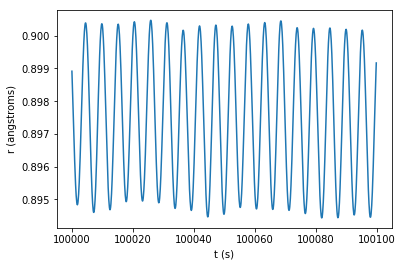

In [106]:
plt.plot(T[1000000:1001000],Rarr[1000000:1001000])
plt.xlabel('t (s)')
plt.ylabel('r (angstroms)')
plt.savefig('Try8.png')
plt.show()

In [8]:
final_t = time.time()
DTime = final_t - start_t
DTime_h = DTime/60. #Tiempo a minutos
print('Tiempo de ejecución: %f minutos'%DTime_h)

Tiempo de ejecución: 5912.090548 minutos


In [9]:
DTime_h/60.

98.53484246439403

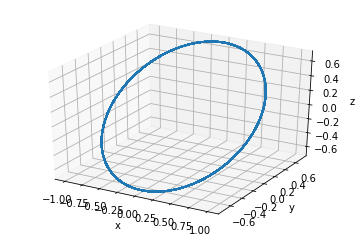

In [97]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.plot3D(Xarr[0:10000],Yarr[0:10000],Zarr[0:10000])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('Orbit1.png')
plt.show() 
plt.close()

In [89]:
plt.clf()
plt.close()

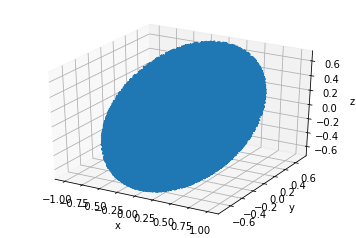

In [98]:
ax = plt.axes(projection='3d')
ax.plot3D(Xarr[::100],Yarr[::100],Zarr[::100])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('Orbit2.png')
plt.show() 

In [110]:
POS = np.vstack((Xarr,Yarr,Zarr))

In [112]:
np.savetxt('Positions.txt',POS.T)